In [ ]:
# Task 1

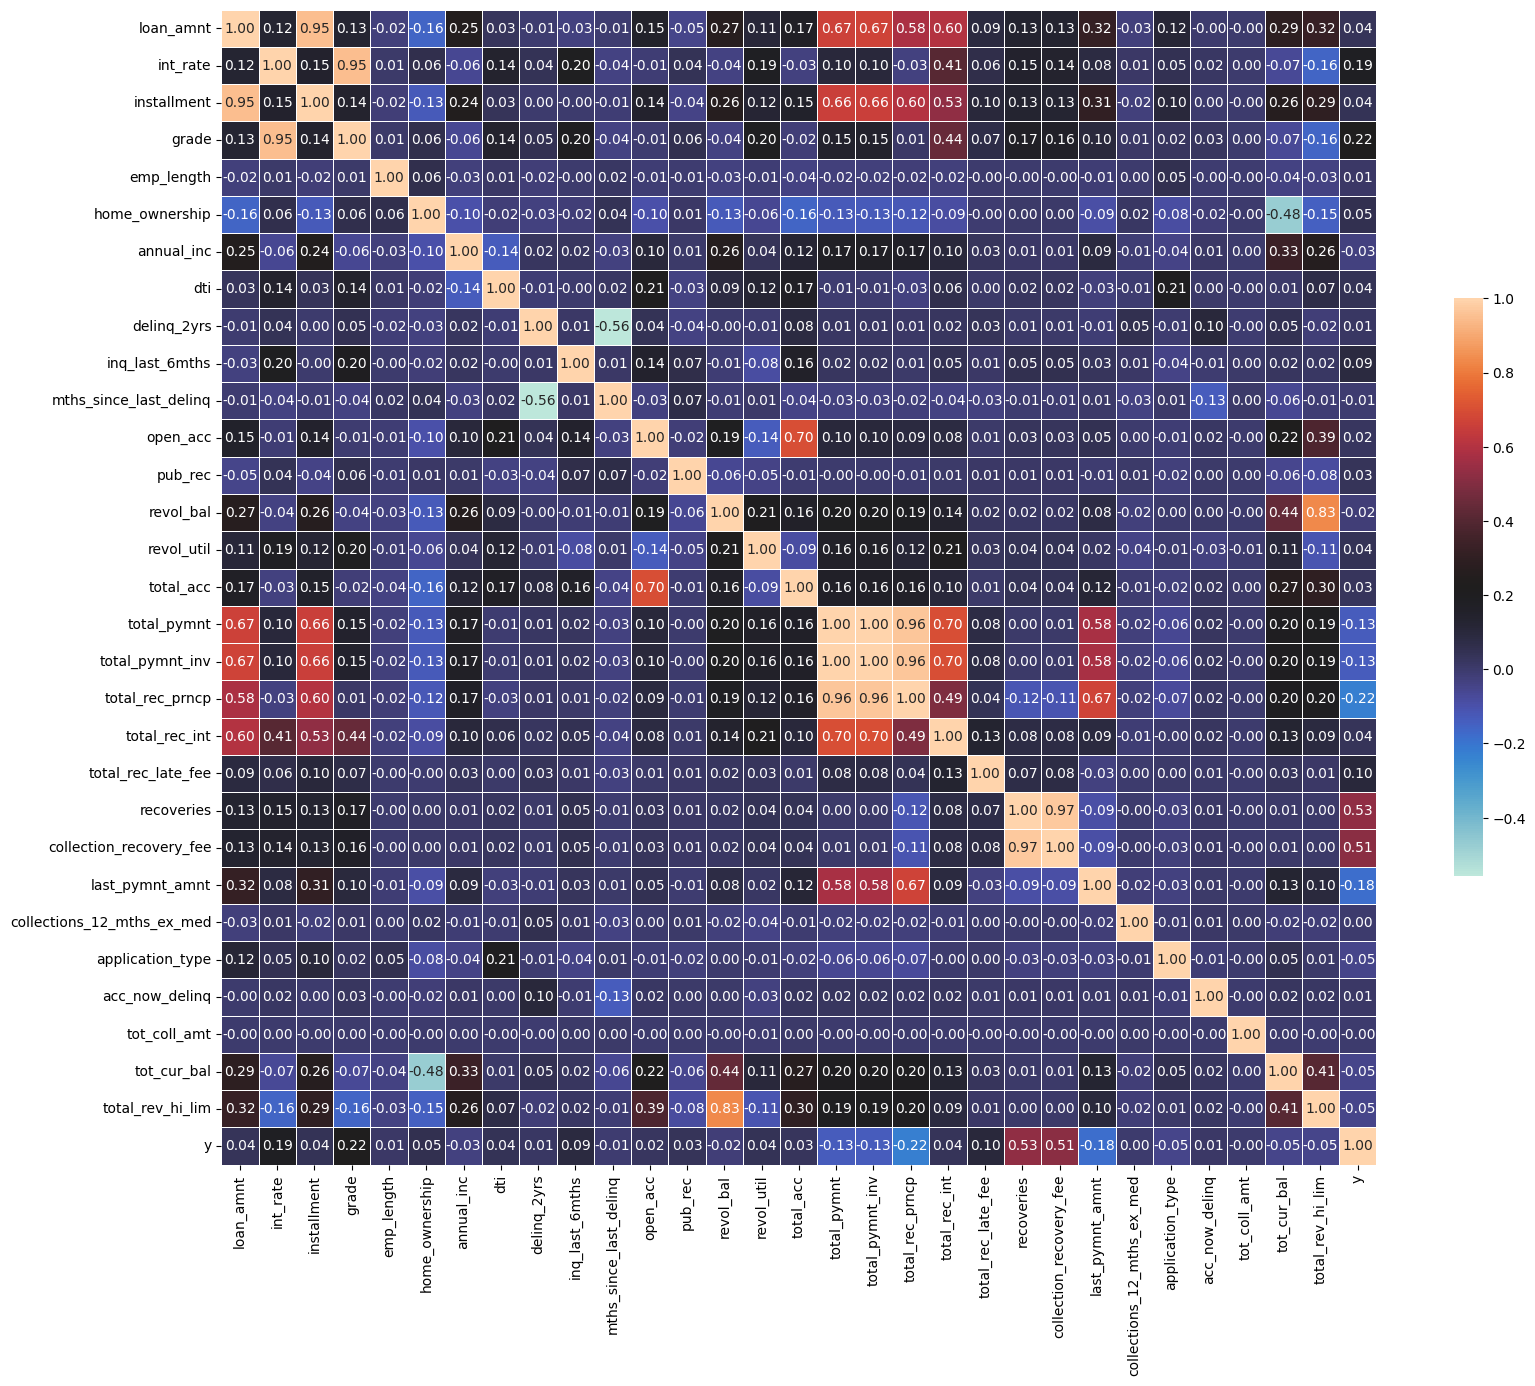

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Reading training and test data
train_dataframe = pd.read_csv("/content/trainData.csv")
test_dataframe = pd.read_csv("/content/testData.csv")

# Creating the target variable
train_dataframe['y'] = (train_dataframe['loan_status'] == "Charged Off").astype(int)
test_dataframe['y'] = (test_dataframe['loan_status'] == "Charged Off").astype(int)

# Dropping the 'loan_status' column as it's been transformed into the target variable
train_dataframe = train_dataframe.drop(columns=['loan_status'])
test_dataframe = test_dataframe.drop(columns=['loan_status'])

# Dropping 'id' and 'member_id' columns for preprocessing
preprocessed_train_dataframe = train_dataframe.drop(columns=['id', 'member_id'])
preprocessed_test_dataframe = test_dataframe.drop(columns=['id', 'member_id'])

# Dropping rows with missing values (NaN)
preprocessed_train_dataframe = preprocessed_train_dataframe.dropna()
preprocessed_test_dataframe = preprocessed_test_dataframe.dropna()

# Encoding categorical variables using Label Encoder
label_encoder = LabelEncoder()
categorical_cols = ['grade', 'emp_length', 'home_ownership', 'application_type']

for i in categorical_cols:
    preprocessed_train_dataframe[i] = label_encoder.fit_transform(preprocessed_train_dataframe[i])

for i in categorical_cols:
    preprocessed_test_dataframe[i] = label_encoder.fit_transform(preprocessed_test_dataframe[i])

# Splitting features (X) and target variable (y) for training data
X_train = preprocessed_train_dataframe.drop(columns=['y'])
y_train = preprocessed_train_dataframe['y'].values

# Splitting features (X) and target variable (y) for test data
X_test = preprocessed_test_dataframe.drop(columns=['y'])
y_test = preprocessed_test_dataframe['y'].values


# Correlation Matrix
corr_matrix = preprocessed_train_dataframe.corr(numeric_only=True)
plt.figure(figsize=(20, 15))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='icefire', cbar_kws={'shrink': .5}, square=True, fmt='.2f', linewidths=.5)
plt.show()

In [2]:
# Linear Regression model
linear_model = LinearRegression()
# Fitting the linear model to the training data
linear_model.fit(X_train, y_train)
# Predicting target variable for training data
y_pred_train_lin = linear_model.predict(X_train)
# Predicting target variable for test data
y_pred_test_lin = linear_model.predict(X_test)
# Calculating mean squared error for the training data prediction
mse_train_lin = mean_squared_error(y_train, y_pred_train_lin)
# Calculating mean squared error for the test data predictions
mse_test_lin = mean_squared_error(y_test, y_pred_test_lin)

print("Mean Squared Error for linear regression train data = ", mse_train_lin)
print("Mean Squared Error for linear regression test data = ", mse_test_lin)

Mean Squared Error for linear regression train data =  0.06850671108774026
Mean Squared Error for linear regression test data =  0.0690257733056279


In [4]:
# Ridge Regression Model
alphas = np.arange(0.01, 100, 0.01)
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
#Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)
# Predicting target variable for training data
y_pred_train_ridge = ridge_model.predict(X_train)
# Predicting target variable for test data
y_pred_test_ridge = ridge_model.predict(X_test)
# Calculating mean squared error for the training data prediction
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
# Calculating mean squared error for the test data prediction
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
# Best alpha value selected by Ridge
best_alpha = ridge_model.alpha_

print("Best alpha value for Ridge = ",best_alpha)
print("Mean Squared Error for best Ridge Regression train data = ",mse_train_ridge)
print("Mean Squared Error for best Ridge Regression test data = ",mse_test_ridge)

Best alpha value for Ridge =  0.08
Mean Squared Error for best Ridge Regression train data =  3.9172651807691405
Mean Squared Error for best Ridge Regression test data =  3.825208371448466


In [3]:
# Lasso Regression Model
scaler = StandardScaler()
# Standardizing the training features
scaled_X_train = scaler.fit_transform(X_train)
# Standardizing the test features
scaled_X_test = scaler.transform(X_test)
# Generating alpha values for Lasso regression
alphas = np.arange(0.001, 100, 0.01)
lasso_model = LassoCV(alphas=alphas, cv=3, max_iter=10000)
# Fit Lasso model to the scaled training data
lasso_model.fit(scaled_X_train, y_train)
# Predicting target variable for training data
y_pred_train_lasso = lasso_model.predict(scaled_X_train)
# Predicting target variable for test data
y_pred_test_lasso = lasso_model.predict(scaled_X_test)
# Calculating mean squared error for the training data prediction
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
# Calculating mean squared error for the test data prediction
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
# Best alpha value selected by Lasso
best_alpha = lasso_model.alpha_

print("Best alpha value for Lasso = ",best_alpha)
print("Mean Squared Error for best Lasso Regression train data = ",mse_train_lasso)
print("Mean Squared Error for best Lasso Regression test data = ",mse_test_lasso)


Best alpha value for Lasso =  0.001
Mean Squared Error for best Lasso Regression train data =  0.06859878989045244
Mean Squared Error for best Lasso Regression test data =  0.06917047840104028


In [5]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)
# Predicting target variable for training data
y_pred_train_rf = rf_model.predict(X_train)
# Predicting target variable for test data
y_pred_test_rf = rf_model.predict(X_test)
# Calculating mean squared error for the training data prediction
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
# Calculating mean squared error for the test data prediction
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

print("Mean Squared Error for best Random Forest train data = ",mse_train_rf)
print("Mean Squared Error for best Random Forest test data = ",mse_test_rf)

Mean Squared Error for best Random Forest train data =  0.00348722545987948
Mean Squared Error for best Random Forest test data =  0.02609761567071659


In [6]:
# Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', random_state=42)
# Fitting the MLP Regressor model to the training data
nn_model.fit(X_train, y_train)
# Predicting target variable for training data
y_pred_train_nn = nn_model.predict(X_train)
# Predicting target variable for test data
y_pred_test_nn = nn_model.predict(X_test)
# Calculating mean squared error for the training data prediction
mse_train_nn = mean_squared_error(y_train, y_pred_train_nn)
# Calculating mean squared error for the test data prediction
mse_test_nn = mean_squared_error(y_test, y_pred_test_nn)

print("Mean Squared Error for Neural Network train data = ",mse_train_nn)
print("Mean Squared Error for Neural Network test data = ",mse_test_nn)

Mean Squared Error for Neural Network train data =  616021.57835395
Mean Squared Error for Neural Network test data =  41099.05548659612


In [7]:
# Task 2
# Extract the correlations of all features with the target variable 'y'
corr_mat = preprocessed_train_dataframe.corr(numeric_only=True)
target_corr_mat = corr_mat['y'].sort_values()

# Display the 10 most positively correlated features
target_corr_mat = target_corr_mat.drop('y')# Exclude the last one which is 'y' itself
print("Top 10 positively correlated features with 'y':\n",target_corr_mat.tail(10))

# Display the 10 most negatively correlated (or least positively correlated) features
print("\nTop 10 negatively correlated features with 'y':\n",target_corr_mat.head(10))
#print(target_corr_mat.head(10))

Top 10 positively correlated features with 'y':
 dti                        0.041488
installment                0.041655
revol_util                 0.043281
home_ownership             0.052045
inq_last_6mths             0.089825
total_rec_late_fee         0.101968
int_rate                   0.189353
grade                      0.216675
collection_recovery_fee    0.514246
recoveries                 0.529974
Name: y, dtype: float64

Top 10 negatively correlated features with 'y':
 total_rec_prncp          -0.223023
last_pymnt_amnt          -0.181980
total_pymnt_inv          -0.132929
total_pymnt              -0.132924
tot_cur_bal              -0.049853
total_rev_hi_lim         -0.048218
application_type         -0.047288
annual_inc               -0.029821
revol_bal                -0.019584
mths_since_last_delinq   -0.008284
Name: y, dtype: float64
